In [1]:
import tensorflow as tf
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import imghdr
import seaborn as sns
from sklearn.utils import shuffle
plt.style.use('dark_background')

C:\Users\salma.muhammad\AppData\Local\Temp\ipykernel_13612\385351831.py:7: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


**_Checking Format_**

In [2]:
data_dir = "./Teeth_Dataset"

Types = list(os.listdir(data_dir))
Illness=list(os.listdir(os.path.join(data_dir,Types[2])))
print(Types)
print(Illness)
print(len(os.listdir(os.path.join(data_dir,Types[2],Illness[1]))))


['Testing', 'Training', 'Validation']
['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']
149


C:\Users\salma.muhammad\AppData\Local\Temp\ipykernel_13612\116409560.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=illness_names, y=illness_counts, palette="Set3")


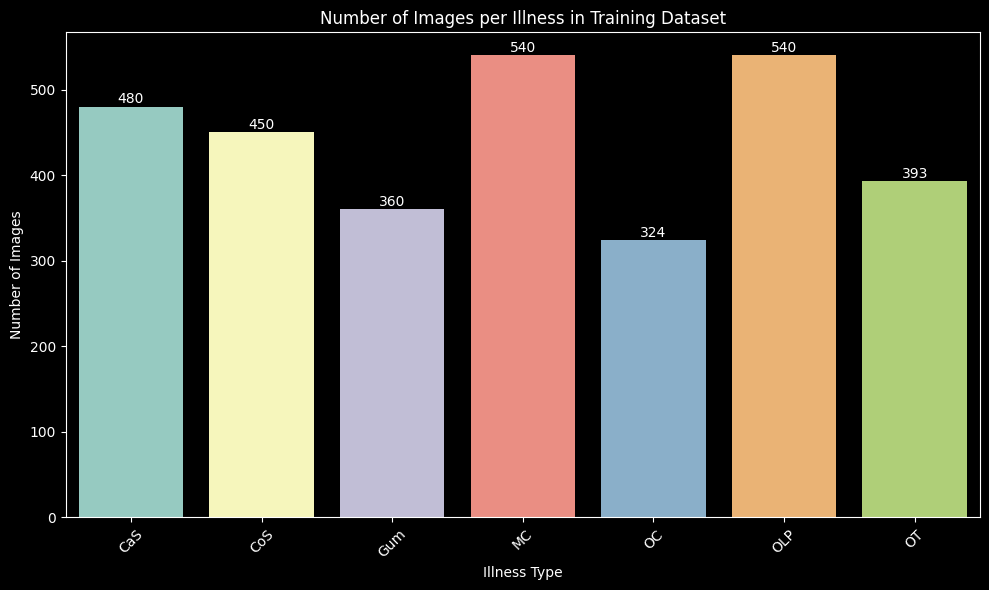

C:\Users\salma.muhammad\AppData\Local\Temp\ipykernel_13612\116409560.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=illness_names, y=illness_counts, palette="Set3")


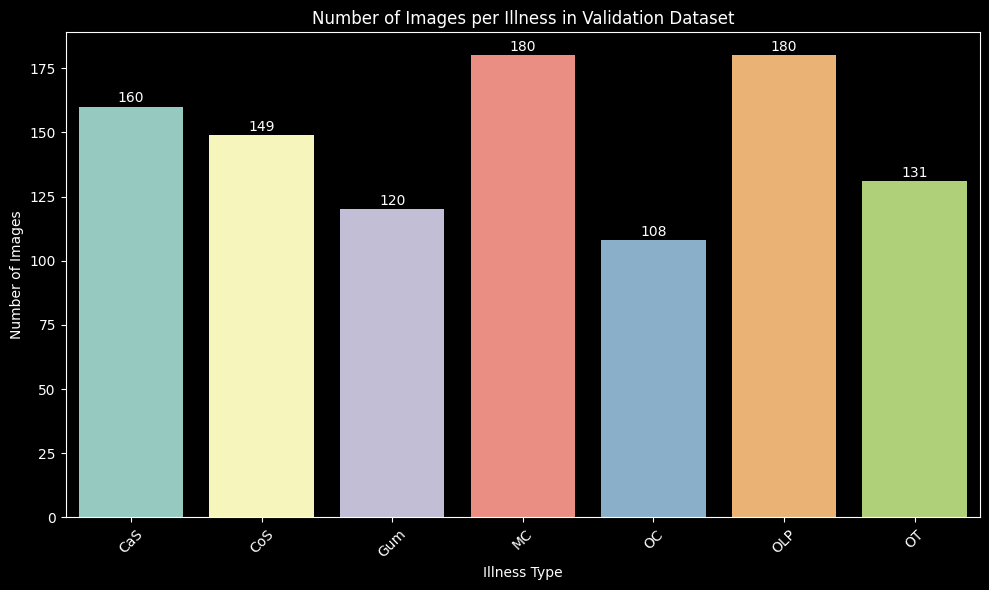

C:\Users\salma.muhammad\AppData\Local\Temp\ipykernel_13612\116409560.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=illness_names, y=illness_counts, palette="Set3")


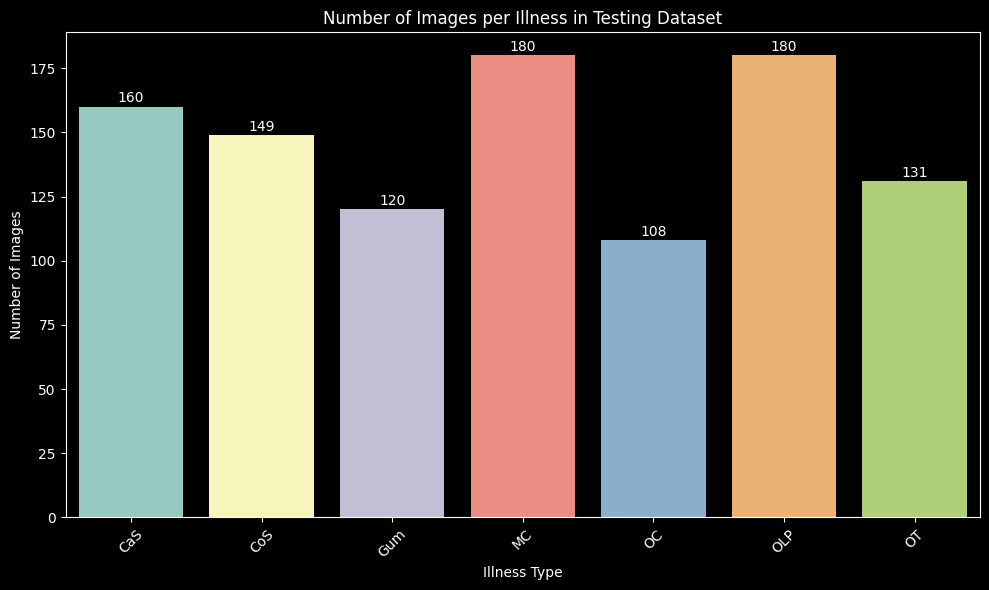

In [3]:
def plot_len_dir(index):
    global Types
    global Illness
    global data_dir
    illness_names = []
    illness_counts = []
    Target = os.path.join(data_dir, Types[index])
    for illness in Illness:
        illness_path = os.path.join(Target, illness)
        num_files = len(os.listdir(illness_path))
        illness_names.append(illness)
        illness_counts.append(num_files)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=illness_names, y=illness_counts, palette="Set3")

    plt.title(f"Number of Images per Illness in {Types[index]} Dataset")
    plt.xlabel("Illness Type")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45)

    for index, value in enumerate(illness_counts):
        plt.text(index, value + 0.5, str(value), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
plot_len_dir(1)
plot_len_dir(2)
plot_len_dir(0)

In [4]:
def check_format():
  global data_dir
  global Types
  global Illness
  counter=0
  allowed=['jpeg','jpg', 'bmp', 'png']
  for sample_Type in Types:
    for sample_Illness in Illness:
      for image in os.listdir(os.path.join(data_dir, sample_Type, sample_Illness)):
        image_path = os.path.join(data_dir, sample_Type, sample_Illness, image)
        try:
          img = cv.imread(image_path)
          if img is None:
                 raise ValueError(f"Image could not be read: {image_path}")

                 actual_format = imghdr.what(image_path)
                 if actual_format not in allowed:
                        print(f"Image not in ext list {image_path} (Detected: {actual_format})")
                        os.remove(image_path)
                        counter += 1
        except Exception as e:
          print(f'Issue with image {image_path}')
  print(counter)
check_format()



0


**_See our Data_**

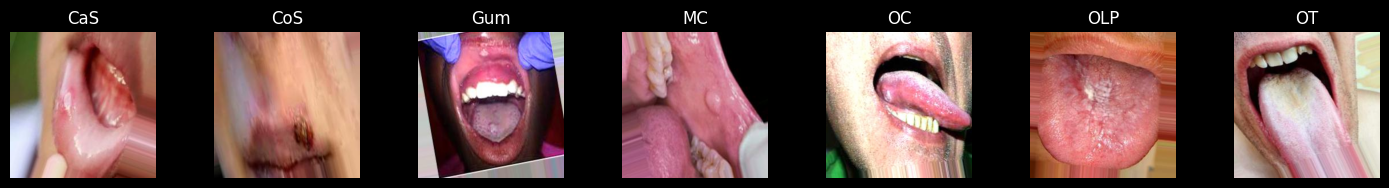

<Figure size 640x480 with 0 Axes>

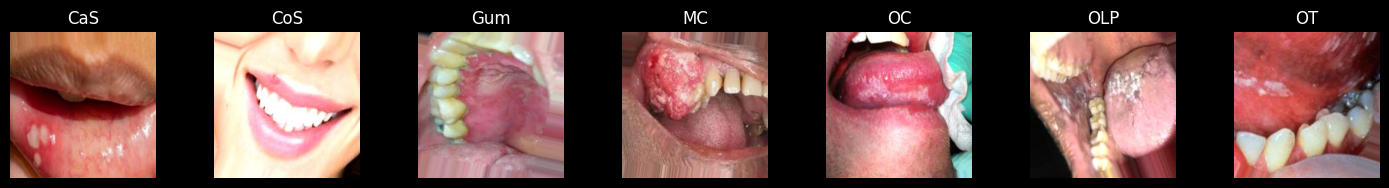

<Figure size 640x480 with 0 Axes>

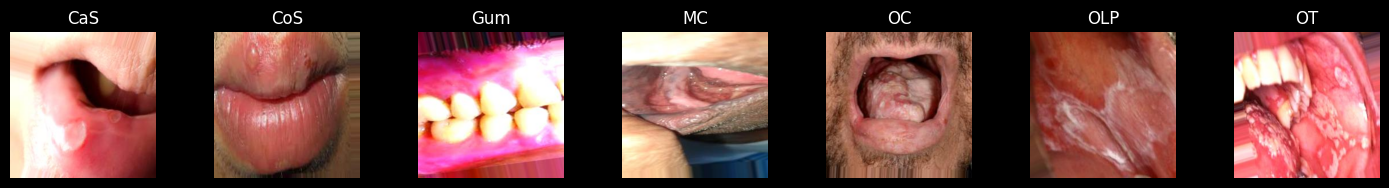

Text(0.5, 1.05, 'Random Images from Test Dataset')

<Figure size 640x480 with 0 Axes>

In [5]:
def plot_one_image_per_illness(category, illness_list):
    global data_dir
    plt.figure(figsize=(14, 7))

    for idx, illness in enumerate(illness_list):
        illness_dir = os.path.join(data_dir, category, illness)

        illness_images = [img for img in os.listdir(illness_dir) if img.endswith(('jpeg', 'jpg', 'bmp', 'png'))]
        if not illness_images:
            continue

        random_image = random.choice(illness_images)
        image_path = os.path.join(illness_dir, random_image)
        img = plt.imread(image_path)

        plt.subplot(1, len(illness_list), idx + 1)
        plt.imshow(img)
        plt.title(illness)

        plt.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.4)
    plt.show()
plot_one_image_per_illness(Types[1], Illness)
plt.suptitle('Random Images from Training Dataset', y=1.05)
plot_one_image_per_illness(Types[2], Illness)
plt.suptitle('Random Images from Validation Dataset', y=1.05)
plot_one_image_per_illness(Types[0], Illness)
plt.suptitle('Random Images from Test Dataset', y=1.05)


./Teeth_Dataset\Training\CaS\a_105_0_9963.jpg


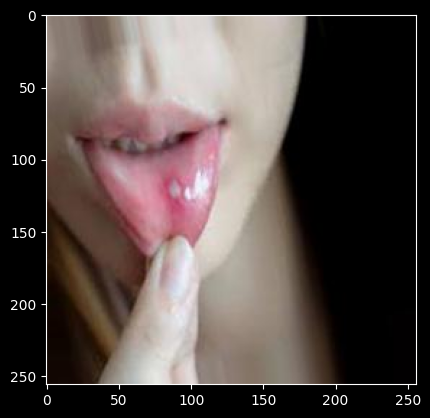

In [6]:
images_in_training=list(os.listdir(os.path.join(data_dir,Types[1],Illness[0])))
path=os.path.join(data_dir,Types[1],Illness[0],images_in_training[34])
print(path)
img=cv.cvtColor(cv.imread(path),cv.COLOR_BGR2RGB)
plt.imshow(img)

In [7]:
print(cv.imread)  # This should be a function, not a string or other type
print(type(cv.imread))

<built-in function imread>
<class 'builtin_function_or_method'>


# **_Preparing and Scalling Our Dataset_**

In [8]:
def list_to_dict(lst):
    return {item: index for index, item in enumerate(lst)}


label_map = list_to_dict(Illness)
print(label_map)

def load_images_from_directory(directory):
    images = []
    labels = []
    global Types
    global Illness
    global data_dir
    global label_map
    Catogry_path=os.path.join(data_dir,directory)
    for class_name in Illness:
        class_dir = os.path.join(Catogry_path, class_name)
        if not os.path.isdir(class_dir):
            continue
        print(class_dir)
        for image_file in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_file)
                image = cv.imread(image_path)
                if image is not None:
                    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Convert to RGB
                    images.append(image)
                    labels.append(label_map[class_name])
    return images, labels
Training_images, Training_labels=load_images_from_directory(Types[1])
Testing_images, Testing_labels=load_images_from_directory(Types[2])
Validation_images, Validation_labels=load_images_from_directory(Types[0])


{'CaS': 0, 'CoS': 1, 'Gum': 2, 'MC': 3, 'OC': 4, 'OLP': 5, 'OT': 6}
./Teeth_Dataset\Training\CaS
./Teeth_Dataset\Training\CoS
./Teeth_Dataset\Training\Gum
./Teeth_Dataset\Training\MC
./Teeth_Dataset\Training\OC
./Teeth_Dataset\Training\OLP
./Teeth_Dataset\Training\OT
./Teeth_Dataset\Validation\CaS
./Teeth_Dataset\Validation\CoS
./Teeth_Dataset\Validation\Gum
./Teeth_Dataset\Validation\MC
./Teeth_Dataset\Validation\OC
./Teeth_Dataset\Validation\OLP
./Teeth_Dataset\Validation\OT
./Teeth_Dataset\Testing\CaS
./Teeth_Dataset\Testing\CoS
./Teeth_Dataset\Testing\Gum
./Teeth_Dataset\Testing\MC
./Teeth_Dataset\Testing\OC
./Teeth_Dataset\Testing\OLP
./Teeth_Dataset\Testing\OT


In [9]:
print(len(Training_images))
print(len(Training_labels))
print(len(Testing_images))
print(len(Testing_labels))
print(len(Validation_images))
print(len(Validation_labels))

3087
3087
1028
1028
1028
1028


In [10]:
# Shuffle the data
train_images, train_labels = shuffle(Training_images, Training_labels, random_state=42)
val_images, val_labels = shuffle(Validation_images, Validation_labels, random_state=42)
test_images, test_labels = shuffle(Testing_images, Testing_labels, random_state=42)

In [11]:
print(len(train_images))
print(len(train_labels))
print(len(test_images))
print(len(test_labels))
print(len(val_images))
print(len(val_labels))

3087
3087
1028
1028
1028
1028


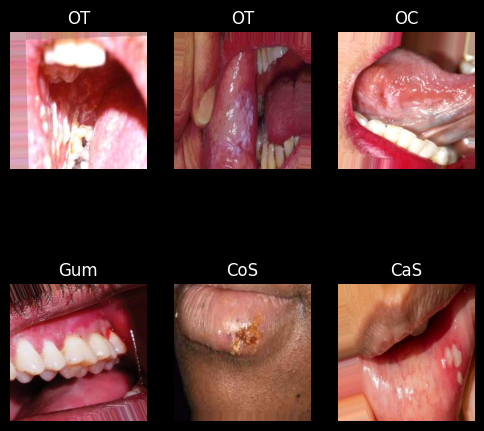

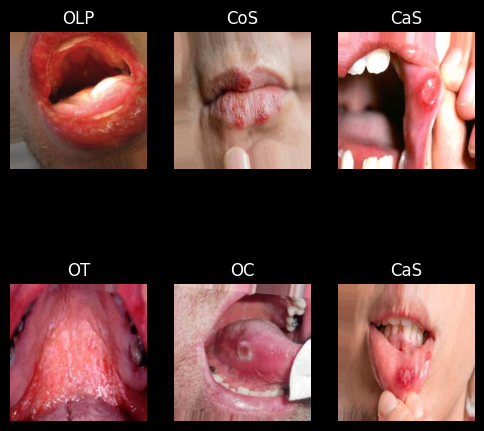

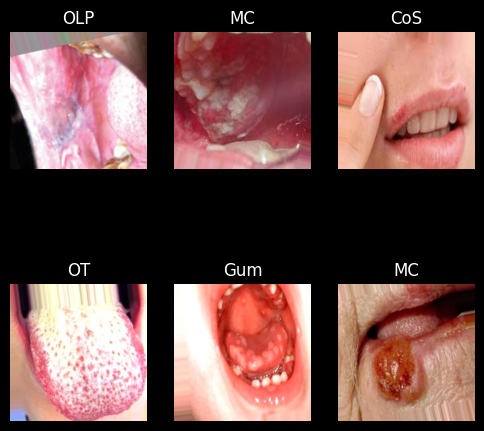

In [12]:
def plot_after_preparring(Cat_images,Cat_labels):
  plt.figure(figsize=(6,6))
  for index in range(6):
    random_index=random.randint(0,len(Cat_images))
    plt.subplot(2,3,index+1)
    plt.imshow(Cat_images[random_index])
    plt.title(Illness[Cat_labels[random_index]])
    plt.axis('off')
  plt.show()

plot_after_preparring(train_images,train_labels)
plot_after_preparring(test_images,test_labels)
plot_after_preparring(val_images,val_labels)

# **_Scalling our Data_**

In [13]:
def scale_images_in_batches(images, batch_size):
    num_images = len(images)
    scaled_images = []
    
    for start in range(0, num_images, batch_size):
        end = min(start + batch_size, num_images)
        batch = np.array(images[start:end]) / 255.0
        scaled_images.append(batch)
    
    return np.concatenate(scaled_images, axis=0)

# Define a batch size that fits your memory constraints
batch_size = 200

train_images_scaled = scale_images_in_batches(train_images, batch_size)
test_images_scaled = scale_images_in_batches(test_images, batch_size)
val_images_scaled = scale_images_in_batches(val_images, batch_size)



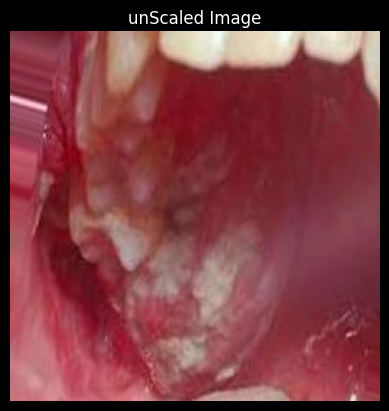

In [14]:
plt.imshow(train_images[0])
plt.title("unScaled Image")
plt.axis('off')  # Turn off axis for better view
plt.show()

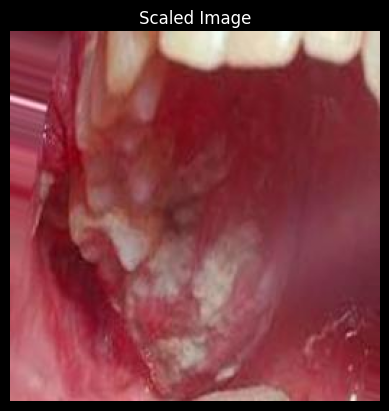

In [15]:
plt.imshow(train_images_scaled[0])
plt.title("Scaled Image")
plt.axis('off')  # Turn off axis for better view
plt.show()

In [16]:
# Find max and min values
train_max = np.max(train_images)
train_min = np.min(train_images)

test_max = np.max(test_images)
test_min = np.min(test_images)

val_max = np.max(val_images)
val_min = np.min(val_images)

print(f"Training Data - Max: {train_max}, Min: {train_min}")
print(f"Testing Data - Max: {test_max}, Min: {test_min}")
print(f"Validation Data - Max: {val_max}, Min: {val_min}")

Training Data - Max: 255, Min: 0
Testing Data - Max: 255, Min: 0
Validation Data - Max: 255, Min: 0


In [17]:
# Find max and min values
train_max = np.max(train_images_scaled)
train_min = np.min(train_images_scaled)

test_max = np.max(test_images_scaled)
test_min = np.min(test_images_scaled)

val_max = np.max(val_images_scaled)
val_min = np.min(val_images_scaled)

print(f"Training Data - Max: {train_max}, Min: {train_min}")
print(f"Testing Data - Max: {test_max}, Min: {test_min}")
print(f"Validation Data - Max: {val_max}, Min: {val_min}")

Training Data - Max: 1.0, Min: 0.0
Testing Data - Max: 1.0, Min: 0.0
Validation Data - Max: 1.0, Min: 0.0


# **_Modeling part_**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
model=Sequential()

In [19]:
def build_model():
    model = Sequential()
    
    # Convolutional layers
    model.add(Conv2D(filters=32,
                     kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(256, 256, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
################################################
    model.add(Conv2D(filters=64,
                     kernel_size=(3, 3),
                     activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
################################################
    model.add(Conv2D(filters=128,
                     kernel_size=(3, 3),
                     activation='relu'))
    model.add(BatchNormalization())   
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
################################################
    model.add(Flatten())
    
    # Dense layers
    model.add(Dense(units=128,
                    activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
       
################################################

    model.add(Dense(7, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [20]:
model=build_model()

c:\Users\salma.muhammad\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,841,287 (56.62 MB)

 Trainable params: 14,840,583 (56.61 MB)

 Non-trainable params: 704 (2.75 KB)

In [22]:
train_labels_scaled = np.array(train_labels)
val_labels_scaled = np.array(val_labels)
test_labels_scaled = np.array(test_labels)
print("Type of train_images_scaled:", type(train_images_scaled))
print("Type of val_images_scaled:", type(val_images_scaled))
print("Type of test_images_scaled:", type(test_images_scaled))
print("Type of train_labels:", type(train_labels_scaled))
print("Type of val_labels:", type(val_labels_scaled))
print("Type of test_labels:", type(test_labels_scaled))

Type of train_images_scaled: <class 'numpy.ndarray'>
Type of val_images_scaled: <class 'numpy.ndarray'>
Type of test_images_scaled: <class 'numpy.ndarray'>
Type of train_labels: <class 'numpy.ndarray'>
Type of val_labels: <class 'numpy.ndarray'>
Type of test_labels: <class 'numpy.ndarray'>


In [23]:
# Print the shape of your input data
print(train_images_scaled.shape)
print(test_images_scaled.shape)
print(val_images_scaled.shape)

(3087, 256, 256, 3)
(1028, 256, 256, 3)
(1028, 256, 256, 3)


In [24]:
train_images_scaled = train_images_scaled.astype('float32')
test_images_scaled = test_images_scaled.astype('float32')
val_images_scaled = val_images_scaled.astype('float32')


In [25]:
print(f"Training Images Shape: {train_images_scaled.shape}")
print(f"Training Labels Shape: {train_labels_scaled.shape}")
print(f"Validation Images Shape: {val_images_scaled.shape}")
print(f"Validation Labels Shape: {val_labels_scaled.shape}")

# Check data types
print(f"Training Images Data Type: {train_images_scaled.dtype}")
print(f"Training Labels Data Type: {train_labels_scaled.dtype}")

Training Images Shape: (3087, 256, 256, 3)
Training Labels Shape: (3087,)
Validation Images Shape: (1028, 256, 256, 3)
Validation Labels Shape: (1028,)
Training Images Data Type: float32
Training Labels Data Type: int32


In [26]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images_scaled, train_labels_scaled))
val_dataset = tf.data.Dataset.from_tensor_slices((val_images_scaled, val_labels_scaled))

batch_size = 32
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size)
val_dataset = val_dataset.batch(batch_size)

In [48]:


# EarlyStopping to stop training when validation loss is not improving
early_stopping = EarlyStopping(patience=5)

# ReduceLROnPlateau to reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, min_lr=0.00001)

# Fit the model
model.fit(train_dataset,
          epochs=10,
          validation_data=val_dataset,
          callbacks=[early_stopping, reduce_lr])


Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 435s 4s/step - accuracy: 0.2204 - loss: 2.4938 - val_accuracy: 0.1761 - val_loss: 3.3932 - learning_rate: 0.0010
Epoch 2/10


/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 424s 4s/step - accuracy: 0.3643 - loss: 1.8307 - val_accuracy: 0.2626 - val_loss: 3.6529 - learning_rate: 0.0010
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 424s 4s/step - accuracy: 0.4450 - loss: 1.5414 - val_accuracy: 0.2461 - val_loss: 3.3524 - learning_rate: 0.0010
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 423s 4s/step - accuracy: 0.5029 - loss: 1.3528 - val_accuracy: 0.3317 - val_loss: 2.3579 - learning_rate: 0.0010
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 426s 4s/step - accuracy: 0.5881 - loss: 1.1212 - val_accuracy: 0.2938 - val_loss: 2.7370 - learning_rate: 0.0010
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 439s 4s/step - accuracy: 0.6927 - loss: 0.9017 - val_accuracy: 0.3842 - val_loss: 2.1198 - learning_rate: 0.0010
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 425s 4s/step - accuracy: 0.7555 - loss: 0.7178 - val_accuracy: 0.3852 - val_loss: 1.9413 - learning_rate: 0.0010
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 422s 4s/step - accuracy: 0.7283 - loss: 0.7810 - val_accuracy: 0.45

In [49]:
val_loss, val_accuracy = model.evaluate(val_images_scaled, val_labels_scaled)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 752ms/step - accuracy: 0.5069 - loss: 1.4598
Validation Loss: 1.4940768480300903
Validation Accuracy: 0.5097275972366333


In [50]:
test_loss, test_accuracy = model.evaluate(test_images_scaled, test_labels_scaled)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 758ms/step - accuracy: 0.5489 - loss: 1.3733
Test Loss: 1.5054717063903809
Test Accuracy: 0.5068093538284302


# Model 2

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Create in-memory data augmentation streams using ImageDataGenerator.flow()
train_generator = datagen.flow(
    train_images_scaled,  # Your preprocessed training images
    train_labels_scaled,  # Your preprocessed training labels
    batch_size=32,
    shuffle=True,  # Shuffle data for each epoch
    seed=None  # Optional seed for reproducibility
)

val_generator = datagen.flow(
    val_images_scaled,  # Your preprocessed validation images
    val_labels_scaled,  # Your preprocessed validation labels
    batch_size=32,
    shuffle=False  # No shuffling for validation data
)

# Early stopping for preventing overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Reduce learning rate on plateau to prevent stagnation
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2, min_lr=1e-5)

# Fit the model using the augmented data generators
history_model = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10


c:\Users\salma.muhammad\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


97/97 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.2074 - loss: 2.7932 - val_accuracy: 0.1751 - val_loss: 5.6496 - learning_rate: 0.0010
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.2638 - loss: 2.1807 - val_accuracy: 0.2004 - val_loss: 3.1993 - learning_rate: 0.0010
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.3600 - loss: 1.8292 - val_accuracy: 0.1887 - val_loss: 3.4937 - learning_rate: 0.0010
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - accuracy: 0.3800 - loss: 1.6936 - val_accuracy: 0.2228 - val_loss: 2.4978 - learning_rate: 0.0010
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.4059 - loss: 1.5761 - val_accuracy: 0.2588 - val_loss: 2.7343 - learning_rate: 0.0010
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.4658 - loss: 1.4435 - val_accuracy: 0.3064 - val_loss: 2.1752 - learning_rate: 0.0010
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.5019 - loss: 1.3573 - val_accuracy: 0.36

In [29]:
val_loss, val_accuracy = model.evaluate(val_images_scaled, val_labels_scaled)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 276ms/step - accuracy: 0.5281 - loss: 1.2361
Validation Loss: 1.1941699981689453
Validation Accuracy: 0.548638105392456


In [30]:
test_loss, test_accuracy = model.evaluate(test_images_scaled, test_labels_scaled)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 273ms/step - accuracy: 0.5497 - loss: 1.2237
Test Loss: 1.221113920211792
Test Accuracy: 0.542801558971405


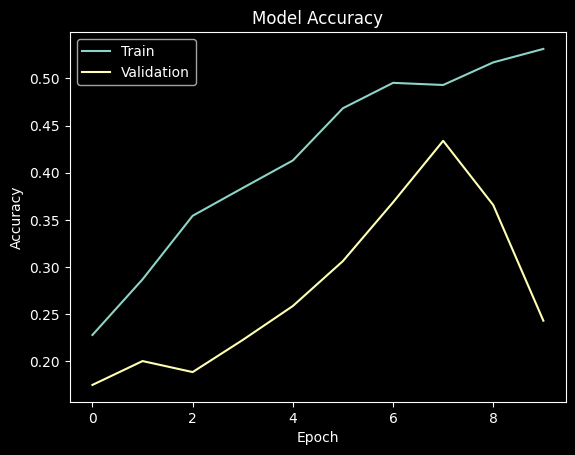

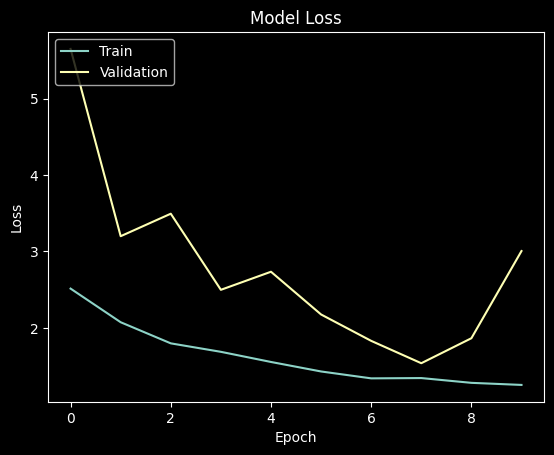

In [31]:
plt.plot(history_model.history['accuracy'])
plt.plot(history_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()